## **Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
x = data['MaxHR']
y = data['Slope']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

In [ ]:
numerator = (len(xtrain) * (np.sum(xtrain * ytrain))) - (np.sum(xtrain) * np.sum(ytrain))
denominator = (len(xtrain) * (np.sum(np.square(xtrain))) - np.square(np.sum(xtrain)))

In [ ]:
slope = numerator / denominator
slope


-0.011661081556399383

In [ ]:
intercept = ytrain.mean() - (slope * xtrain.mean())
intercept

3.346894175301217

In [ ]:
def linear(xtest):
  ypred = (slope * xtest) + intercept
  return ypred

In [ ]:
yperd = linear(xtest)

yperd

277    1.574410
256    1.691021
105    1.527765
171    2.052514
63     1.364510
         ...   
128    1.364510
198    1.457799
234    1.446138
15     1.317866
208    1.539427
Name: MaxHR, Length: 76, dtype: float64

In [ ]:
#error calculation

error = ytest - yperd
SSE = (error ** 2).sum()
print(SSE)

27.525785366086396


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(ytest, yperd))
rmse

0.6018150765774097

In [ ]:
r2 = r2_score(ytest, yperd)
r2

0.02244874400814656

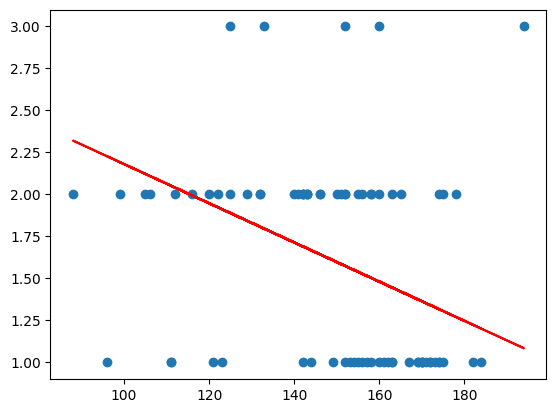

In [ ]:
plt.scatter(xtest, ytest)

plt.plot(xtest, yperd, color = 'red')
plt.show()


In [ ]:
#checking the accuracy using user input

user = float(input("enter the number"))

print(linear(user))

enter the number150
1.5977319418413094


## **Multilinear Regression**
 

---







In [ ]:
df = pd.read_csv('Heart1.csv')
df.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
df.isnull().sum()

RestBP      0
Chol        0
Fbs         0
RestECG     0
MaxHR       0
ExAng       0
Oldpeak    21
Slope       0
Ca          0
Thal        0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

RestBP     0
Chol       0
Fbs        0
RestECG    0
MaxHR      0
ExAng      0
Oldpeak    0
Slope      0
Ca         0
Thal       0
dtype: int64

In [ ]:
#Spiltting dataset into dependent and independent variables 
x1 = df['Oldpeak']
x2 = df['MaxHR']
y = df['Slope']

In [ ]:
#Which one is easy You can choose the one below also does the same job
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
y_mean = np.mean(y)
n = x1.count()
a = sum(x1**2) - (sum(x1)**2/n)
b = sum(x2**2) - (sum(x2)**2/n)
c = sum(x1*y) - (sum(x1)*sum(y)/n)
d = sum(x2*y) - (sum(x2)*sum(y)/n)
e = sum(x1*x2) - (sum(x1)*sum(x2)/n)


b1 = ((b * c) - (e * d))/((a * b) - (e**2))
b2 = ((a * d) - (e * c))/((a * b) - (e**2))
b0 = y_mean - (b1*x1_mean) - (b2*x2_mean)

print(b0)
print(b1)
print(b2)

2.1958776608044737
0.25549244273183686
-0.005642582470618569


In [ ]:
X1 = np.array(x1)
X2 = np.array(x2)
Y = np.array(y)
X = np.column_stack((np.ones_like(X1), X1, X2))
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
b0, b1, b2 = beta
print(b0)
print(b1)
print(b2)

2.195877660804472
0.2554924427318379
-0.005642582470618591


In [ ]:
y_pred = b0 + (b1 * x1) + (b2 * x2)
y_pred

0      1.937123
1      1.969717
2      2.132265
3      2.034938
4      1.583043
         ...   
298    1.757648
299    2.268948
300    1.853572
301    1.214068
302    1.219711
Length: 282, dtype: float64

In [ ]:
#Performance metrics

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)

rmse = np.sqrt(mse)

print(mse, rmse)

0.24794183571406173 0.49793758214665995


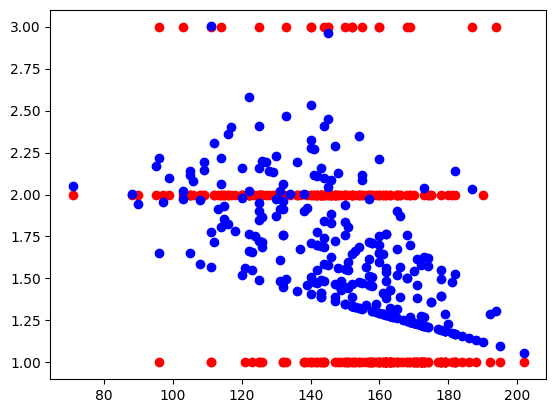

In [ ]:
plt.scatter(x2, y, color = 'red')
plt.scatter(x2, y_pred, color = 'blue')
plt.show()

In [ ]:
user = float(input())
user1 = float(input())
print(b0 + (b1 * user) + (b2 * user1))

2.3
150
1.9371229084949102


In [ ]:
df

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal
...,...,...,...,...,...,...,...,...,...,...
298,110,264,0,0,132,0,1.2,2,0,reversable
299,144,193,1,0,141,0,3.4,2,2,reversable
300,130,131,0,0,115,1,1.2,2,1,reversable
301,130,236,0,2,174,0,0.0,2,1,normal


In [ ]:
#MULTILINEAR WITH LIBRARY
from sklearn.linear_model import LinearRegression
newX = df[['Oldpeak','MaxHR']]
newY = df['Slope']

x_train, x_test, y_train, y_test = train_test_split(newX, newY, test_size = 0.25)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
user = float(input())
user1 = float(input())

model.predict([[user, user1]])

2.3
150


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.95005594])

# ##**LOGISTIC REGRESSION** 

In [ ]:
df1 = pd.read_csv('Heart1.csv')
df1.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
#PREPROCESSING

df1.isnull().sum()

RestBP      0
Chol        0
Fbs         0
RestECG     0
MaxHR       0
ExAng       0
Oldpeak    21
Slope       0
Ca          0
Thal        0
dtype: int64

In [ ]:
#HENCE THE NULL VALUES ARE MORE THAN 10% they are removed
df1.dropna(inplace = True)
df1.isnull().sum()

RestBP     0
Chol       0
Fbs        0
RestECG    0
MaxHR      0
ExAng      0
Oldpeak    0
Slope      0
Ca         0
Thal       0
dtype: int64

In [ ]:
x = df1[['MaxHR']]
y = df1['Thal']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
#USING LIBRARY
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')
model.fit(xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
#WITHOUT LIBRARY
numerator = (len(xtrain) * (np.sum(xtrain.values * ytrain.values))) - (np.sum(xtrain.values) * np.sum(ytrain.values))
denominator = (len(xtrain) * np.sum(np.square(xtrain.values)) - np.square(np.sum(xtrain.values)))

KeyboardInterrupt: ignored

In [ ]:
slope = numerator / denominator
intercept = ytrain.mean() - (slope * xtrain.mean())

In [ ]:
def logistic_regression(xtest):
    ypred = 1 / ( 1 + np.exp(-( (slope * xtest.values) + intercept ) ) )
    ypred = ypred.squeeze()
    ypred = np.where(ypred < 0.5, 0, 1)
    return ypred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
conf = confusion_matrix(ytest, ypred)
print(classification_report(ytest, ypred))
acc = accuracy_score(ytest, ypred)

print(conf)
print(acc)

##**Single Layer Perceptron**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron

data = pd.read_csv('Heart1.csv')
data.head()


,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
#eta0 is the Learning rate
model = Perceptron(random_state= 100, eta0 = 0.5)

model.fit(xtrain, ytrain)

Perceptron(eta0=0.5, random_state=100)

In [ ]:
ypred = model.predict(xtest)
ypred

array([1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [ ]:
#model accuracy
model.score(xtest, ytest)

0.5087719298245614

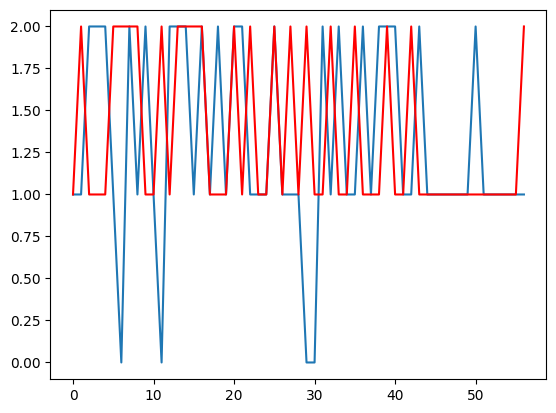

In [ ]:
plt.plot(ytest)
plt.plot(ypred, color = 'red')
plt.show()

##**Multi Layer Perceptron**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier

data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [ ]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100)

mlp.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 20), max_iter=100)

In [ ]:
pred = mlp.predict(xtest)
pred

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, pred)
print(mse, rmse, mae)

0.42105263157894735 0.6488856845230502 0.38596491228070173


In [ ]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[ 0  1  1]
 [ 0 24  4]
 [ 0 15 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.86      0.71        28
           2       0.71      0.44      0.55        27

    accuracy                           0.63        57
   macro avg       0.44      0.43      0.42        57
weighted avg       0.63      0.63      0.61        57



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


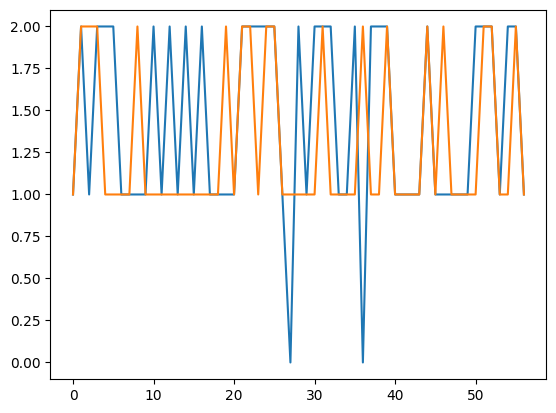

In [ ]:
plt.plot(ytest)
plt.plot(pred)
plt.show()

##**SVM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [ ]:
svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [ ]:
predict = svc.predict(xtest)
predict

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1])

In [ ]:
print(confusion_matrix(ytest, predict))
print(classification_report(ytest, predict))

[[ 0  2  1]
 [ 0 25  4]
 [ 0 14 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.61      0.86      0.71        29
           2       0.69      0.44      0.54        25

    accuracy                           0.63        57
   macro avg       0.43      0.43      0.42        57
weighted avg       0.61      0.63      0.60        57



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(ytest, predict))

0.631578947368421


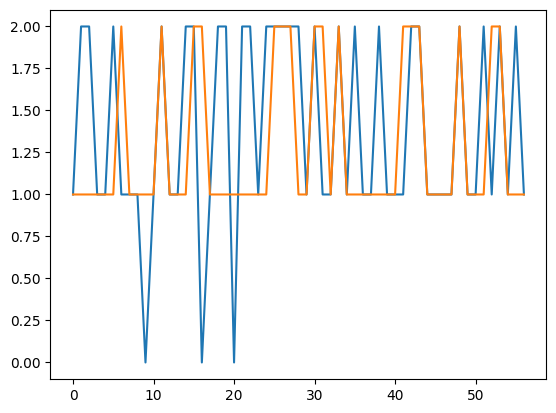

In [ ]:
plt.plot(ytest)
plt.plot(predict)
plt.show()

##**Agglomertive clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering 

data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

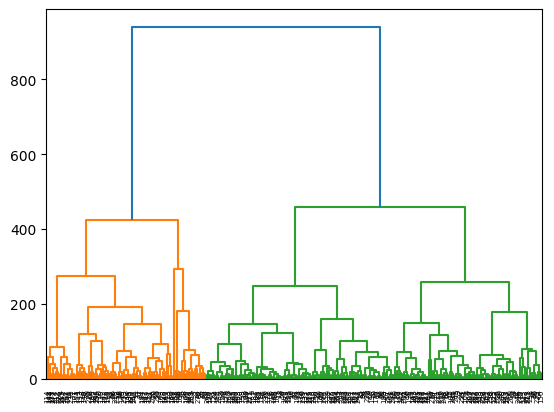

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method= 'ward',metric = 'euclidean'))

In [ ]:
model = AgglomerativeClustering(n_clusters = 3)

model.fit(x)
labels = model.labels_
predicted = model.fit_predict(x)

In [ ]:
x1 = list(range(1,283))
df = pd.DataFrame(labels, columns = ['cluster'])
df.insert(0, 'No', x1)
df.head() 

,No,cluster
0,1,2
1,2,0
2,3,1
3,4,2
4,5,1


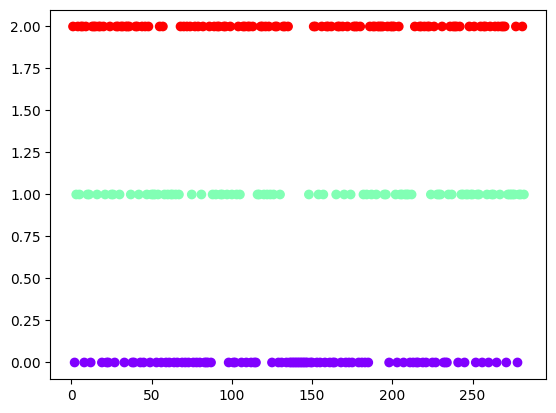

In [ ]:
plt.scatter(df['No'], df['cluster'], c= predicted, cmap = 'rainbow')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

s = silhouette_score(x, labels, metric = 'euclidean')
d = davies_bouldin_score(x, labels)
print(s, d)

0.2455812327822541 1.2049602347033048


##**Fuzzy - C - Mean**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from fcmeans import FCM

data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, ytrain, xtest, ytest = train_test_split(x, y, test_size = 0.25)

In [ ]:
model = FCM(n_clusters = 7)

model.fit(np.array(xtrain))

In [ ]:
centeriod = model.centers
label = model.predict(np.array(xtrain))
model.partition_coefficient

0.057899107758463506

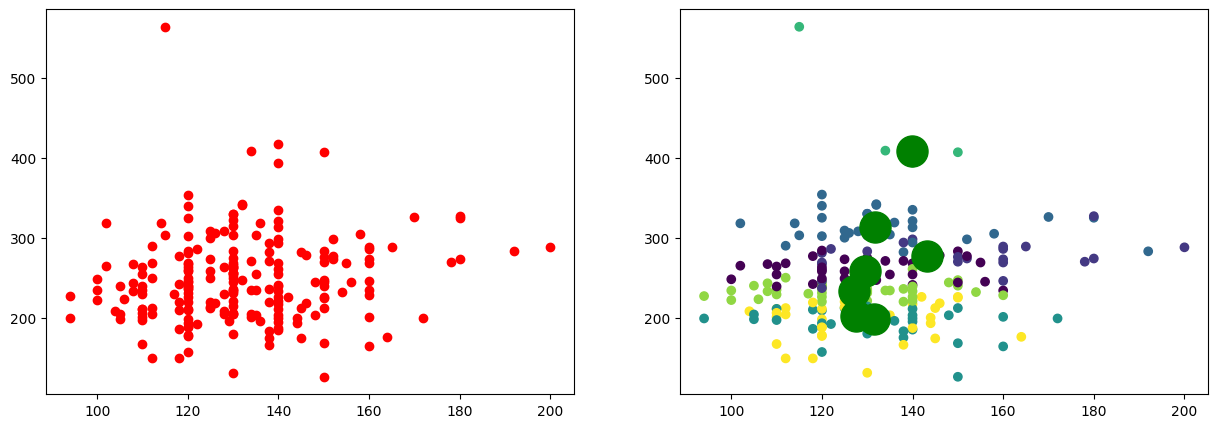

In [ ]:
x = np.array(xtrain)
f, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].scatter(x[:,0], x[:,1], color = 'red', alpha = 1)
axes[1].scatter(x[:,0], x[:,1], c = label, alpha = 1)
axes[1].scatter(centeriod[:,0], centeriod[:,1], s = 500, color = 'green')

In [ ]:
#Metrics for performance
print(model.partition_coefficient)
print(model.partition_entropy_coefficient)

0.057899107758463506
0.2622480030892326


##**Self Organizing Map**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from minisom import MiniSom
data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.isnull().sum()
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data['Thal']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
x = minmax.fit_transform(x)

In [ ]:
model = MiniSom(x=10, y=10, input_len= 9, sigma= 1.0, learning_rate = 0.5)

model.random_weights_init(x)
model.train_random(data = x, num_iteration=100)

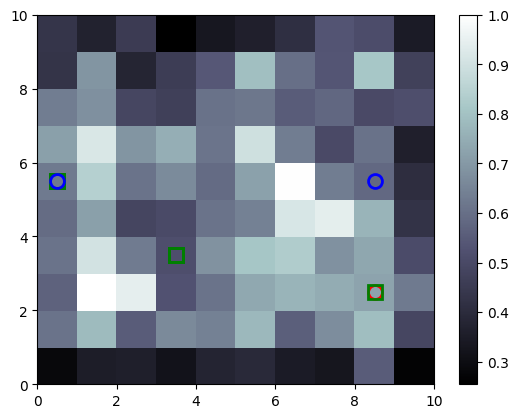

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(model.distance_map().T)
colorbar()
markers = ['o', 's', 'o']
for i, x in enumerate(x):
    w = model.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()

## **Apriori Algorithm**

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

data = pd.read_csv('Heart1.csv')
data.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
data.dropna(inplace = True)

## **Ensemble learning**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
data = pd.read_csv('Heart1.csv')
data.dropna(inplace = True)

In [ ]:
x = data.drop('Thal', axis = 1)
y = data[['Thal']]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25)

In [ ]:
model1 = RandomForestClassifier()
model1.fit(xtrain, ytrain)
predict1 = model1.predict(xtest)
model1.score(xtest, ytest)

<ipython-input-46-212701bbfb46>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(xtrain, ytrain)


0.6619718309859155

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
conf = confusion_matrix(ytest, predict1)
clas = classification_report(ytest, predict1)
print(conf)
print(clas)

[[ 0  1  2]
 [ 0 31 10]
 [ 0 11 16]]
              precision    recall  f1-score   support

       fixed       0.00      0.00      0.00         3
      normal       0.72      0.76      0.74        41
  reversable       0.57      0.59      0.58        27

    accuracy                           0.66        71
   macro avg       0.43      0.45      0.44        71
weighted avg       0.63      0.66      0.65        71



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc = accuracy_score(ytest, predict1)
acc

0.6619718309859155

In [ ]:
model2 = AdaBoostClassifier(n_estimators = 100)
model2.fit(xtrain, ytrain)

predict2 = model2.predict(xtest)
model2.score(xtest, ytest)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5352112676056338

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
conf = confusion_matrix(ytest, predict2)
clas = classification_report(ytest, predict2)
print(conf)
print(clas)

[[ 0  1  2]
 [ 1 30 10]
 [ 5 14  8]]
              precision    recall  f1-score   support

       fixed       0.00      0.00      0.00         3
      normal       0.67      0.73      0.70        41
  reversable       0.40      0.30      0.34        27

    accuracy                           0.54        71
   macro avg       0.36      0.34      0.35        71
weighted avg       0.54      0.54      0.53        71



In [ ]:
acc = accuracy_score(ytest, predict2)
acc

0.5352112676056338